In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

**Q1 (10 points)**

The `heart` dataframe contains the survival time after receiving a heart transplant, the age of the patient and whether or not the survival time was censored

- Number of Observations - 69
- Number of Variables - 3

Variable name definitions::

- survival - Days after surgery until death
- censors - indicates if an observation is censored. 1 is uncensored
- age - age at the time of surgery

Answer the following questions with respect to the `heart` data set:

- Sort the data frame by age in descending order (oldest at top) without making a copy 
- How many patients were censored?
- What is the average age for uncensored patients under the age of 45?
- Find the mean and standard deviation of age and survival time for each value of the cenoring variable.
- Plot the linear regression of survival (y-axis) against age (x-axis) conditioned on censoring (i.e. either have two separate plots or a single plot using color to distinguish censored and uncensored patients).

In [2]:
heart = sm.datasets.heart.load_pandas().data
heart.head(n=6)

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0
5,64.0,1.0,54.6


In [3]:
heart.sort_values('age', ascending=False, inplace=True)
heart.head()

,survival,censors,age
17,60.0,1.0,64.5
21,47.0,1.0,61.5
12,730.0,1.0,58.4
8,23.0,1.0,56.9
47,63.0,1.0,56.4


In [4]:
sum(heart.censors == 0)

24

In [5]:
heart.loc[(heart.censors == 1) & (heart.age < 45), 'age'].mean()

38.418181818181814

In [6]:
heart.groupby(['censors']).agg(['mean', 'std'])

survival                    age          
               mean         std       mean       std
censors                                             
0.0      664.625000  526.214604  41.729167  9.177026
1.0      223.288889  332.657182  48.484444  7.840163

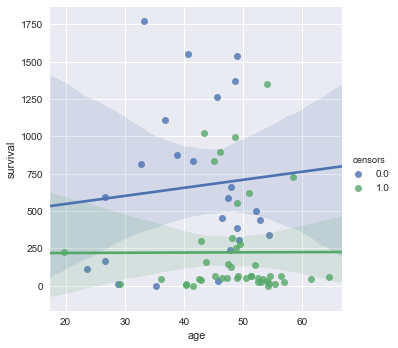

In [7]:
import seaborn as sns

sns.lmplot(data=heart, x='age', y='survival', hue='censors')
pass

**Q2 (10 points)**

Write a `flatmap` function that works like `map` except that the function given takes a list and returns a list  of lists that is then flattened (4 points).

In other words, `flatmap` takes two arguments, a function and a list (or other iterable), just like `map`. Howevver the function given as the first agument takes a single argument and returns a list (or ohter iterable). In order to get a simple list back, we need to unravel the reuslting list of lists, hence the flatten part.

For example,

```python
flatmap(lambda x: x.split(), ["hello world", "the quick dog"])
```

should return

```python
["hello", "world", "the", "quick", "dog"]
```

In [8]:
def flatten(list_of_lists):
    """Flatten a list of lists."""
    for alist in list_of_lists:
        for item in alist:
            yield item

def flatmap(f, xs):
    """First map, then flatten result."""
    return flatten(map(f, xs))

In [9]:
list(flatmap(lambda x: x.split(), ["hello world", "the quick dog"]))

['hello', 'world', 'the', 'quick', 'dog']

**Q3 (10 points)**

An affine transformation of a vector $x$ is the operation $Ax + b$, where $A$ is a matrix and $b$ is a vector. 

- Write a function to perform an affine transformation.
- Write a function to reverse the affine transformation  
- Perform an affine transformation of a random 3 by 3 matrix A, and random 3-vectors $x$ and $b$ drawn from the standard uniform distribution with random seed = 1234 and save the result as $y$. Perform the reverse affine transform on $y$ to recover the original vector $x$.

In [10]:
def affine(x, A, b):
    """Affine transofrm."""
    return A@x + b

In [11]:
def rev_affine(y, A, b):
    """Reverse affine transform."""
    return np.linalg.solve(A, (y - b))

In [12]:
A = np.random.random((3,3,))
b = np.random.random(3)
x = np.random.random(3)

In [13]:
x

array([ 0.91397072,  0.44084231,  0.73953615])

In [14]:
y = affine(x, A, b)
y

array([ 1.61972625,  1.53725841,  1.14072047])

In [15]:
rev_affine(y, A, b)

array([ 0.91397072,  0.44084231,  0.73953615])

**Q4 (10 points)**

You are given the following DNA sequecne in FASTA format.

```python
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA
'''
```

* Remove the comment line and combine the 4 lines of nucleotide symbols into a single string
* Count the frequecny of all 16 two-letter combinations in the string. 

In [16]:
dna = '''> A simulated DNA sequence.
TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAAC
GACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGA
GCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGG
ACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA
'''
dna = ''.join(dna.split('\n')[1:])
dna

'TTAGGCAGTAACCCCGCGATAGGTAGAGCACGCAATCGTCAAGGCGTGCGGTAGGGCTTCCGTGTCTTACCCAAAGAAACGACGTAACGTTCCCCGGGCGGTTAAACCAAATCCACTTCACCAACGGCATAACGCGAAGCCCAAACTAAATCGCGCTCGAGCGGACGCACATTCGCTAGGCTGTGTAGGGGCAGTCTCCGTTAAGGACGATTACCACGTGATGGTAGTTCGCAACATTGGACTGTCGGGAATTCCCGAAGGCACTTAAGCGGAGTCTTAGCGTACAGTAACGCAGTCCCGCGTGAACGACTGACAGATGA'

In [17]:
from collections import Counter

c = Counter(zip(dna[:-1], dna[1:]))
c

Counter({('A', 'A'): 26,
         ('A', 'C'): 25,
         ('A', 'G'): 22,
         ('A', 'T'): 11,
         ('C', 'A'): 21,
         ('C', 'C'): 20,
         ('C', 'G'): 33,
         ('C', 'T'): 12,
         ('G', 'A'): 19,
         ('G', 'C'): 24,
         ('G', 'G'): 22,
         ('G', 'T'): 23,
         ('T', 'A'): 19,
         ('T', 'C'): 17,
         ('T', 'G'): 11,
         ('T', 'T'): 14})

In [18]:
sum(c.values())

319

**Q5 (10 points)**

The code given below performs a stochastic gradient descent to fit a quadratic polynomila to $n$ data points. Maake the code run faster by:

* Using `numba` JIT 
* using `Cython`

Some test code is provided. Please run this for your optimized versios to confirm that they give the same resuls as the orignal code.

In [19]:
def sgd(b, x, y, max_iter, alpha):
    n = x.shape[0]
    for i in range(max_iter):
        for j in range(n):
            b[0] -= alpha * (2*(b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[1] =- alpha * (2*x[j] * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[2] -= alpha * (2*x[j]**2 * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
    return b

CPU times: user 7.88 s, sys: 8.68 ms, total: 7.89 s
Wall time: 7.89 s


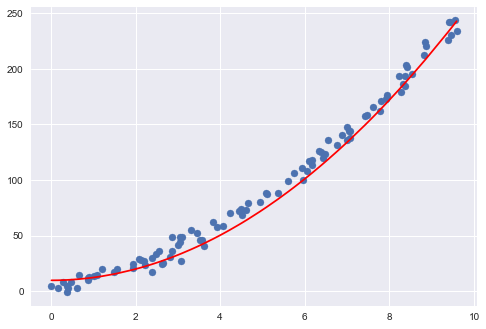

In [20]:
%%time
np.random.seed(12345)
n = 10000
x = np.linspace(0, 10, n)
y = 2*x**2 + 6*x + 3 + np.random.normal(0, 5, n)
k = 100
alpha = 0.00001

b0 = np.random.random(3) 
b = sgd(b0, x, y, k, alpha)

yhat = b[0] + b[1]*x+ b[2]*x**2
idx = sorted(np.random.choice(n, 100))
plt.scatter(x[idx], y[idx])
plt.plot(x[idx], yhat[idx], c='red')
pass

In [21]:
from numba import jit

@jit(nopython = True)
def sgd_numba(b, x, y, max_iter, alpha):
    n = x.shape[0]
    for i in range(max_iter):
        for j in range(n):
            b[0] -= alpha * (2*(b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[1] =- alpha * (2*x[j] * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[2] -= alpha * (2*x[j]**2 * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
    return b

In [22]:
# Call once to trigger compilation
sgd_numba(b0, x, y, k, alpha);

CPU times: user 105 ms, sys: 3.06 ms, total: 108 ms
Wall time: 106 ms


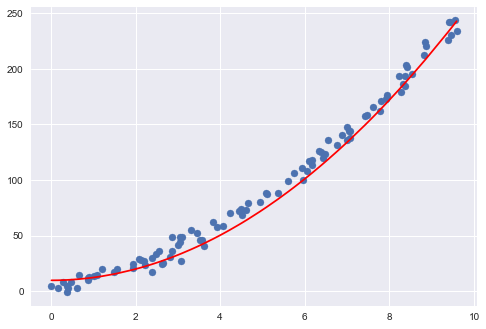

In [23]:
%%time
np.random.seed(12345)
n = 10000
x = np.linspace(0, 10, n)
y = 2*x**2 + 6*x + 3 + np.random.normal(0, 5, n)
k = 100
alpha = 0.00001

b0 = np.random.random(3) 
b = sgd_numba(b0, x, y, k, alpha)

yhat = b[0] + b[1]*x+ b[2]*x**2
idx = sorted(np.random.choice(n, 100))
plt.scatter(x[idx], y[idx])
plt.plot(x[idx], yhat[idx], c='red')
pass

In [24]:
%load_ext cython

In [25]:
%%cython -a
cimport cython

@cython.wraparound(False)
@cython.boundscheck(False)
def sgd_cython(double[:] b, double[:] x, double[:] y, int max_iter, double alpha):
    cdef int n = x.shape[0]
    cdef int i, j
    
    for i in range(max_iter):
        for j in range(n):
            b[0] -= alpha * (2*(b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[1] =- alpha * (2*x[j] * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[2] -= alpha * (2*x[j]**2 * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
    return b

CPU times: user 104 ms, sys: 2.52 ms, total: 106 ms
Wall time: 105 ms


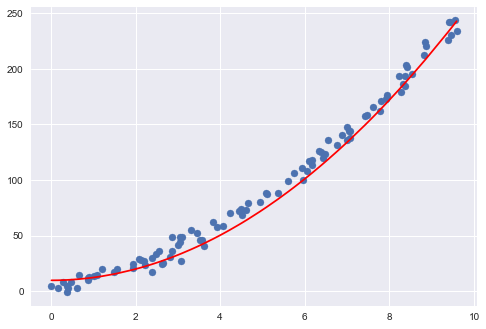

In [26]:
%%time
np.random.seed(12345)
n = 10000
x = np.linspace(0, 10, n)
y = 2*x**2 + 6*x + 3 + np.random.normal(0, 5, n)
k = 100
alpha = 0.00001

b0 = np.random.random(3) 
b = sgd_cython(b0, x, y, k, alpha)

yhat = b[0] + b[1]*x+ b[2]*x**2
idx = sorted(np.random.choice(n, 100))
plt.scatter(x[idx], y[idx])
plt.plot(x[idx], yhat[idx], c='red')
pass